# Marketing Target Analysis

## Data Dictionary

1 - **age** (numeric) <br>
2 - **job** : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
            "blue-collar","self-employed","retired","technician","services") <br>
3 - **marital** : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed) <br>
4 - **education** (categorical: "unknown","secondary","primary","tertiary") <br>
5 - **default**: has credit in default? (binary: "yes","no") <br>
6 - **balance**: average yearly balance, in euros (numeric) <br>
7 - **housing**: has housing loan? (binary: "yes","no") <br>
8 - **loan**: has personal loan? (binary: "yes","no") <br>

### Related with the last contact of the current campaign:
9 - **contact**: contact communication type (categorical: "unknown","telephone","cellular") <br>
10 - **day**: last contact day of the month (numeric) <br>
11 - **month**: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec") <br>
12 - **duration**: last contact duration, in seconds (numeric) <br>

### other attributes:
13 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact) <br>
14 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1                     means client was not previously contacted) <br>
15 - **previous**: number of contacts performed before this campaign and for this client (numeric) <br>
16 - **poutcome**: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success") <br>

### Output variable (desired target):
17 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

## Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Manipulation

### Training Data

In [2]:
train = pd.read_csv('train.csv', delimiter=';')
train = train.drop(columns=['day','month'])
print(f'Shape: {train.shape}')
print(f'Data Types: \n\n{train.dtypes}')
train.describe()

Shape: (45211, 15)
Data Types: 

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


,age,balance,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [3]:
train['pdays'] = train.pdays.replace(-1, 0)

binary_mapper = {
    'no': 0,
    'yes': 1,
}

train['default'] = train['default'].map(binary_mapper)
train['housing'] = train['housing'].map(binary_mapper)
train['loan'] = train['loan'].map(binary_mapper)
train['y'] = train['y'].map(binary_mapper)

train['duration'] = train['duration'] / 60
train.to_csv('new train.csv')

train.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,4.350000,1,0,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,2.516667,1,0,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,1.266667,1,0,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,1.533333,1,0,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,3.300000,1,0,0,unknown,0


### Testing Data

In [4]:
test = pd.read_csv('test.csv', delimiter=';')
test = test.drop(columns=['day','month'])
print(f'Shape: {test.shape}')
print(f'Data Types: \n\n{test.dtypes}')
test.describe()

Shape: (4521, 15)
Data Types: 

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


,age,balance,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,3025.000000,50.000000,871.000000,25.000000


In [5]:
test['pdays'] = test.pdays.replace(-1, 0)

binary_mapper = {
    'no': 0,
    'yes': 1,
}

test['default'] = test['default'].map(binary_mapper)
test['housing'] = test['housing'].map(binary_mapper)
test['loan'] = test['loan'].map(binary_mapper)
test['y'] = test['y'].map(binary_mapper)

test['duration'] = test['duration'] / 60
test.to_csv('new test.csv')

test.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,1.316667,1,0,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,3.666667,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,3.083333,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3.316667,4,0,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,3.766667,1,0,0,unknown,0


## Initial Variable Analysis

In [6]:
df = train.append(test)

C:\Users\austi\AppData\Local\Temp\ipykernel_14072\1858088059.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = train.append(test)


### Categorical Variables

In [7]:
%%HTML
<div class='tableauPlaceholder' id='viz1673905528345' style='position: relative'><noscript><a href='#'><img alt='Contact vs Sub ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ma&#47;MarketingCampaignVariableAnalysisContactType&#47;ContactvsSub&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='MarketingCampaignVariableAnalysisContactType&#47;ContactvsSub' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ma&#47;MarketingCampaignVariableAnalysisContactType&#47;ContactvsSub&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1673905528345');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1100px';vizElement.style.height='627px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1100px';vizElement.style.height='627px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>
<div class='tableauPlaceholder' id='viz1673905628593' style='position: relative'><noscript><a href='#'><img alt='Default vs Sub ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ma&#47;MarketingCampaignVariableAnalysisCreditinDefault&#47;DefaultvsSub&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='MarketingCampaignVariableAnalysisCreditinDefault&#47;DefaultvsSub' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ma&#47;MarketingCampaignVariableAnalysisCreditinDefault&#47;DefaultvsSub&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1673905628593');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1100px';vizElement.style.height='627px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1100px';vizElement.style.height='627px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>
<div class='tableauPlaceholder' id='viz1673905658731' style='position: relative'><noscript><a href='#'><img alt='Education vs Sub ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ma&#47;MarketingCampaignVariableAnalysisEducation&#47;EducationvsSub&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='MarketingCampaignVariableAnalysisEducation&#47;EducationvsSub' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ma&#47;MarketingCampaignVariableAnalysisEducation&#47;EducationvsSub&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1673905658731');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1100px';vizElement.style.height='627px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1100px';vizElement.style.height='627px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>
<div class='tableauPlaceholder' id='viz1673905693204' style='position: relative'><noscript><a href='#'><img alt='Housing vs Sub ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ma&#47;MarketingCampaignVariableAnalysisHousingLoan&#47;HousingvsSub&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='MarketingCampaignVariableAnalysisHousingLoan&#47;HousingvsSub' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ma&#47;MarketingCampaignVariableAnalysisHousingLoan&#47;HousingvsSub&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1673905693204');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1100px';vizElement.style.height='627px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1100px';vizElement.style.height='627px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>
<div class='tableauPlaceholder' id='viz1673905716035' style='position: relative'><noscript><a href='#'><img alt='Job vs Sub ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ma&#47;MarketingCampaignVariableAnalysisJob&#47;JobvsSub&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='MarketingCampaignVariableAnalysisJob&#47;JobvsSub' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ma&#47;MarketingCampaignVariableAnalysisJob&#47;JobvsSub&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1673905716035');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1100px';vizElement.style.height='627px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1100px';vizElement.style.height='627px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>
<div class='tableauPlaceholder' id='viz1673905754495' style='position: relative'><noscript><a href='#'><img alt='Loan vs Sub ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ma&#47;MarketingCampaignVariableAnalysisPersonalLoan&#47;LoanvsSub&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='MarketingCampaignVariableAnalysisPersonalLoan&#47;LoanvsSub' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ma&#47;MarketingCampaignVariableAnalysisPersonalLoan&#47;LoanvsSub&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1673905754495');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1100px';vizElement.style.height='627px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1100px';vizElement.style.height='627px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>
<div class='tableauPlaceholder' id='viz1673905906868' style='position: relative'><noscript><a href='#'><img alt='Marital vs Sub ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ma&#47;MarketingCampaignVariableAnalysisMaritalStatus&#47;MaritalvsSub&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='MarketingCampaignVariableAnalysisMaritalStatus&#47;MaritalvsSub' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ma&#47;MarketingCampaignVariableAnalysisMaritalStatus&#47;MaritalvsSub&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1673905906868');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1100px';vizElement.style.height='627px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1100px';vizElement.style.height='627px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>
<div class='tableauPlaceholder' id='viz1673900812045' style='position: relative'><noscript><a href='#'><img alt='Poutcome vs Sub ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ma&#47;MarketingCampaignVariableAnalysisPreviousOutcome&#47;PoutcomevsSub&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='MarketingCampaignVariableAnalysisPreviousOutcome&#47;PoutcomevsSub' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ma&#47;MarketingCampaignVariableAnalysisPreviousOutcome&#47;PoutcomevsSub&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1673900812045');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1100px';vizElement.style.height='627px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1100px';vizElement.style.height='627px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### Numeric Variables

In [8]:
%%HTML

<div class='tableauPlaceholder' id='viz1673929858781' style='position: relative'><noscript><a href='#'><img alt='Age vs Sub ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ma&#47;MarketingCampaignVariableAnalysisAge&#47;AgevsSub&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='MarketingCampaignVariableAnalysisAge&#47;AgevsSub' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ma&#47;MarketingCampaignVariableAnalysisAge&#47;AgevsSub&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1673929858781');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1100px';vizElement.style.height='627px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1100px';vizElement.style.height='627px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>
<div class='tableauPlaceholder' id='viz1673929839306' style='position: relative'><noscript><a href='#'><img alt='Balance vs Sub ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ma&#47;MarketingCampaignVariableAnalysisAverageYearlyBalance&#47;BalancevsSub&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='MarketingCampaignVariableAnalysisAverageYearlyBalance&#47;BalancevsSub' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ma&#47;MarketingCampaignVariableAnalysisAverageYearlyBalance&#47;BalancevsSub&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1673929839306');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1100px';vizElement.style.height='627px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1100px';vizElement.style.height='627px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>
<div class='tableauPlaceholder' id='viz1673929817569' style='position: relative'><noscript><a href='#'><img alt='Campaign vs Sub ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ma&#47;MarketingCampaignVariableAnalysisContactsDuringCampaign&#47;CampaignvsSub&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='MarketingCampaignVariableAnalysisContactsDuringCampaign&#47;CampaignvsSub' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ma&#47;MarketingCampaignVariableAnalysisContactsDuringCampaign&#47;CampaignvsSub&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1673929817569');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1100px';vizElement.style.height='627px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1100px';vizElement.style.height='627px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>
<div class='tableauPlaceholder' id='viz1673929794949' style='position: relative'><noscript><a href='#'><img alt='Duration vs Sub ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ma&#47;MarketingCampaignVariableAnalysisLastContactDuration&#47;DurationvsSub&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='MarketingCampaignVariableAnalysisLastContactDuration&#47;DurationvsSub' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ma&#47;MarketingCampaignVariableAnalysisLastContactDuration&#47;DurationvsSub&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1673929794949');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1100px';vizElement.style.height='627px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1100px';vizElement.style.height='627px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>
<div class='tableauPlaceholder' id='viz1673929772616' style='position: relative'><noscript><a href='#'><img alt='Pdays vs Sub ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ma&#47;MarketingCampaignVariableAnalysisDaysSinceLastCampaign&#47;PdaysvsSub&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='MarketingCampaignVariableAnalysisDaysSinceLastCampaign&#47;PdaysvsSub' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ma&#47;MarketingCampaignVariableAnalysisDaysSinceLastCampaign&#47;PdaysvsSub&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1673929772616');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1100px';vizElement.style.height='627px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1100px';vizElement.style.height='627px';} else { vizElement.style.width='100%';vizElement.style.height='877px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>
<div class='tableauPlaceholder' id='viz1673929745117' style='position: relative'><noscript><a href='#'><img alt='Previous vs Sub ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ma&#47;MarketingCampaignVariableAnalysisContactsBeforeCampain&#47;PreviousvsSub&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='MarketingCampaignVariableAnalysisContactsBeforeCampain&#47;PreviousvsSub' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ma&#47;MarketingCampaignVariableAnalysisContactsBeforeCampain&#47;PreviousvsSub&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1673929745117');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1100px';vizElement.style.height='627px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1100px';vizElement.style.height='627px';} else { vizElement.style.width='100%';vizElement.style.height='827px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

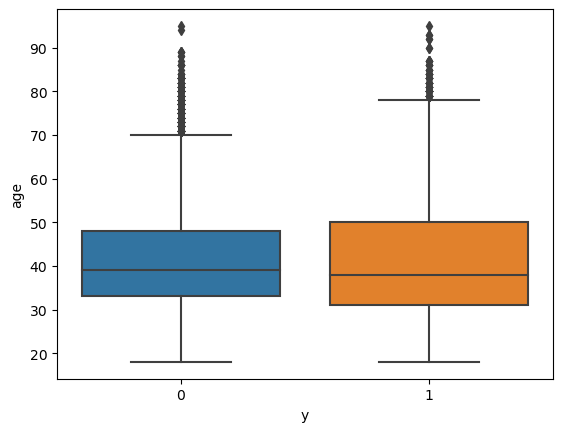

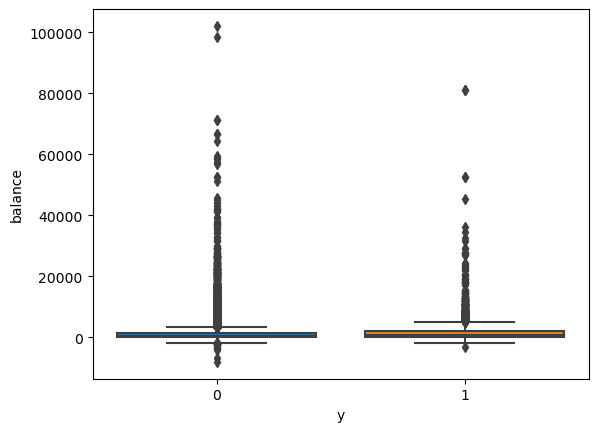

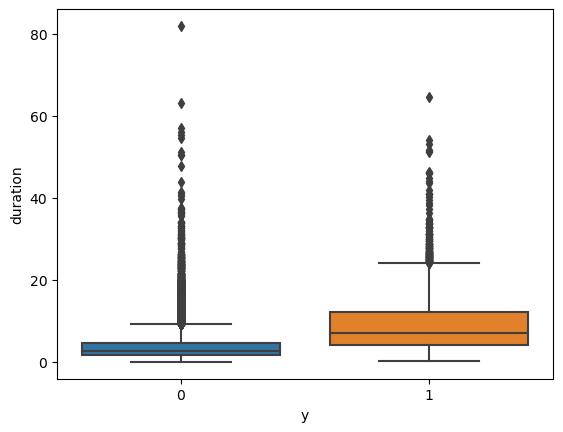

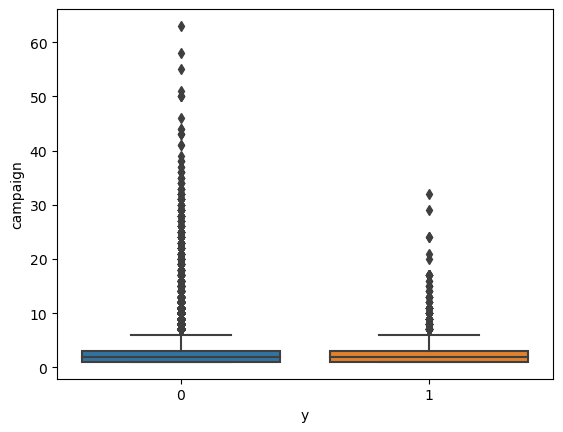

In [9]:
num = ['age', 'balance', 'duration', 'campaign']
for n in num: 
    sns.boxplot(x = df['y'], y = df[n])
    plt.show()

## One Hot Encoding

In [10]:
for col in df.columns:
    if df[col].dtype == 'object':
        dummies = pd.get_dummies(df[col], prefix=col)
        df = df.drop(columns=[col])
        df = pd.concat([df, dummies], axis=1)

In [11]:
df.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,4.350000,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,2.516667,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,1.266667,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,1.533333,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,3.300000,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1


## Manage Outliers in Numeric Columns

*'pdays' and 'previous' were not included due to IQR being 0 (1st campaign for customer)*

Shape: (38140, 36)



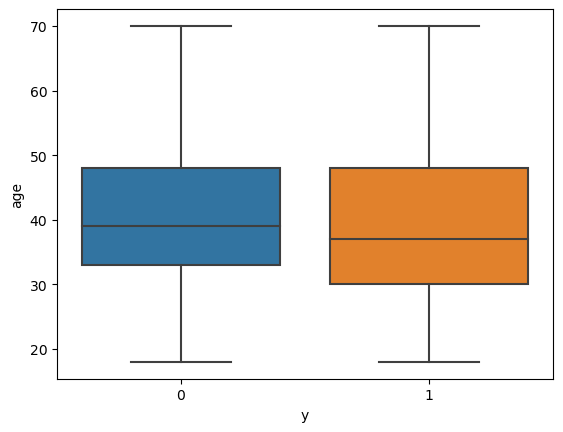

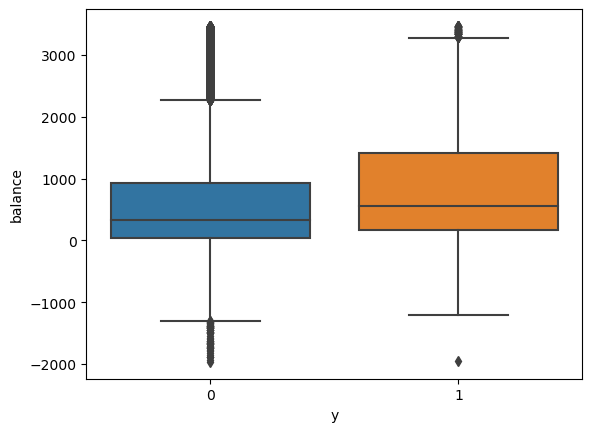

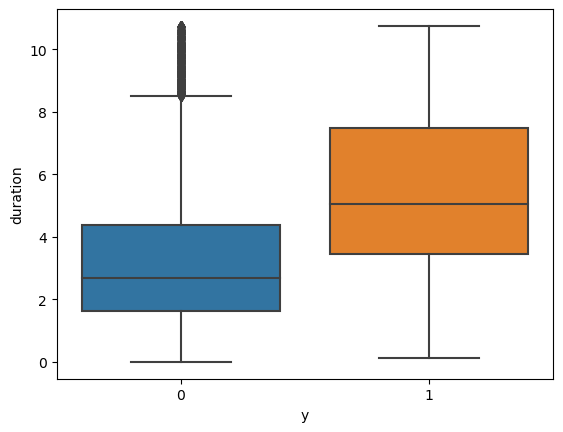

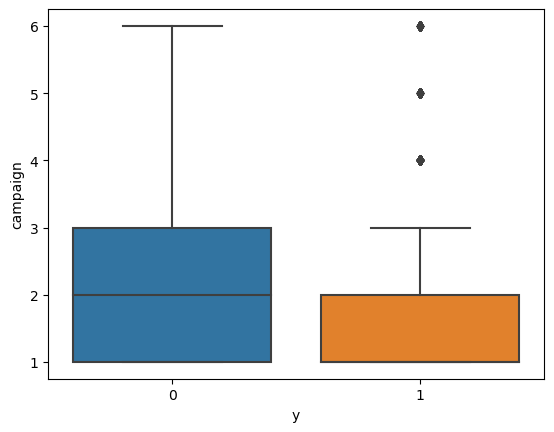

In [12]:
Q1 = df[num].quantile(0.25)
Q3 = df[num].quantile(0.75)
IQR = Q3 - Q1
df2 = df[~((df[num] < (Q1 - 1.5 * IQR)) | (df[num] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f'Shape: {df2.shape}')
print()

for n in num: 
    sns.boxplot(x = df2['y'], y = df2[n])
    plt.show()

## Specify Target and Features

In [13]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import statsmodels.formula.api as sm 
import statsmodels.api as sm2 
from sklearn.model_selection import GridSearchCV

In [14]:
target = 'y'

features = [col for col in df2.columns if col != target]

X = df2[features].copy()
y = df2[target].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=18)

## Models

### Decision Tree

In [15]:
dt = tree.DecisionTreeClassifier()
parameters = {'criterion': ("gini", "entropy", "log_loss"),
              'splitter': ('best', 'random'),
              'max_depth': [1,2,3,4,5]}

clf = GridSearchCV(dt, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': [1, 2, 3, 4, 5],
                         'splitter': ('best', 'random')})

In [16]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}

In [17]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8978500262191924

In [18]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth = 4, criterion = 'gini', splitter = 'best')
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9307813319349764

In [19]:
print(tree.export_text(clf, feature_names=features))

|--- poutcome_success <= 0.50
|   |--- duration <= 6.08
|   |   |--- duration <= 3.44
|   |   |   |--- housing <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- housing >  0.50
|   |   |   |   |--- class: 0
|   |   |--- duration >  3.44
|   |   |   |--- housing <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- housing >  0.50
|   |   |   |   |--- class: 0
|   |--- duration >  6.08
|   |   |--- contact_unknown <= 0.50
|   |   |   |--- pdays <= 370.50
|   |   |   |   |--- class: 0
|   |   |   |--- pdays >  370.50
|   |   |   |   |--- class: 1
|   |   |--- contact_unknown >  0.50
|   |   |   |--- duration <= 7.88
|   |   |   |   |--- class: 0
|   |   |   |--- duration >  7.88
|   |   |   |   |--- class: 0
|--- poutcome_success >  0.50
|   |--- duration <= 2.74
|   |   |--- duration <= 1.38
|   |   |   |--- age <= 52.00
|   |   |   |   |--- class: 0
|   |   |   |--- age >  52.00
|   |   |   |   |--- class: 0
|   |   |--- duration >  1.38
|   |   |   |--- job_technician <= 0.50
| 

### Random Forest

In [20]:
rf = RandomForestClassifier()
parameters = {'n_estimators': (50, 100, 250),
              'criterion': ["gini", "entropy", "log_loss"],
              'max_depth': [1,2,3,4,5]}

clf = GridSearchCV(rf, parameters, n_jobs=-1)
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': (50, 100, 250)})

In [21]:
clf.best_params_

{'criterion': 'log_loss', 'max_depth': 5, 'n_estimators': 250}

In [22]:
clf = RandomForestClassifier(random_state=0)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9390665967488201

In [23]:
clf = RandomForestClassifier(random_state=0, criterion = 'log_loss', max_depth = 5, n_estimators = 100)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9287886733088621

### Logistic Regression

In [24]:
data = train.append(test)

C:\Users\austi\AppData\Local\Temp\ipykernel_14072\3862322379.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = train.append(test)


In [25]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,4.350000,1,0,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,2.516667,1,0,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,1.266667,1,0,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,1.533333,1,0,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,3.300000,1,0,0,unknown,0


In [26]:
target = 'y'

features = [col for col in data.columns if (col != target) and (col != 'age') and (col != 'default') and (col != 'pdays')]

X = data[features].copy()
y = data[target].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=18)

all_columns = ' + '.join(features)
formula = "y ~ " + all_columns
print("Formula: ", formula, "\n")
trainingdata = pd.concat([X_train,y_train], axis = 1)
lr = sm.logit(formula, data=trainingdata).fit()

print(lr.summary())

odds = np.exp(lr.params)
print('Odds Ratio for Variables:')
print()
print(odds)

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

pred = round(lr.predict(X_test))
cm = confusion_matrix(y_true=list(y_test), y_pred=list(pred))
mcr = (960 + 269) / (cm.sum())
acc_score = accuracy_score(y_true=list(y_test), y_pred=list(pred))
auc_score = roc_auc_score(y_true=list(y_test), y_score=list(pred))

print(f'Confusion Matrix : \n {cm}')
print()
print(f'Misclassification Rate : {round(mcr, 3)}')
print(f'Accuracy Score :         {round(acc_score, 3)}')
print(f'Roc AUC Score :          {round(auc_score, 3)}')

Formula:  y ~ job + marital + education + balance + housing + loan + contact + duration + campaign + previous + poutcome 

Optimization terminated successfully.
         Current function value: 0.251292
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                37299
Model:                          Logit   Df Residuals:                    37271
Method:                           MLE   Df Model:                           27
Date:                Mon, 16 Jan 2023   Pseudo R-squ.:                  0.3044
Time:                        22:45:18   Log-Likelihood:                -9372.9
converged:                       True   LL-Null:                       -13476.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------

In [27]:
Q1 = data[num].quantile(0.25)
Q3 = data[num].quantile(0.75)
IQR = Q3 - Q1
data2 = data[~((data[num] < (Q1 - 1.5 * IQR)) | (data[num] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f'Shape: {data2.shape}')

target = 'y'

features = [col for col in data2.columns if (col != target) and (col != 'age') and (col != 'default') and (col != 'pdays')]

X = data2[features].copy()
y = data2[target].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=18)

all_columns = ' + '.join(features)
formula = "y ~ " + all_columns
print("Formula: ", formula, "\n")
trainingdata = pd.concat([X_train,y_train], axis = 1)
lr = sm.logit(formula, data=trainingdata).fit()

print(lr.summary())

odds = np.exp(lr.params)
print('Odds Ratio for Variables:')
print()
print(odds)

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

pred = round(lr.predict(X_test))
cm = confusion_matrix(y_true=list(y_test), y_pred=list(pred))
mcr = (960 + 269) / (cm.sum())
acc_score = accuracy_score(y_true=list(y_test), y_pred=list(pred))
auc_score = roc_auc_score(y_true=list(y_test), y_score=list(pred))

print(f'Confusion Matrix : \n {cm}')
print()
print(f'Misclassification Rate : {round(mcr, 3)}')
print(f'Accuracy Score :         {round(acc_score, 3)}')
print(f'Roc AUC Score :          {round(auc_score, 3)}')

Shape: (38140, 15)
Formula:  y ~ job + marital + education + balance + housing + loan + contact + duration + campaign + previous + poutcome 

Optimization terminated successfully.
         Current function value: 0.200710
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                28605
Model:                          Logit   Df Residuals:                    28577
Method:                           MLE   Df Model:                           27
Date:                Mon, 16 Jan 2023   Pseudo R-squ.:                  0.3098
Time:                        22:45:19   Log-Likelihood:                -5741.3
converged:                       True   LL-Null:                       -8317.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------

In [2]:
%load_ext rpy2.ipython

C:\Users\austi\anaconda3\envs\crisp_demo\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [3]:
%%R
library(readr)
train <- read_csv("new train.csv")
test <- read_csv("new test.csv")
df <- rbind(train, test)
attach(df)

R[write to console]: 
R[write to console]: indexing new train.csv [====================================] 2.15GB/s, eta:  0s
                                                                                                                   
R[write to console]: 


New names:
* `` -> `...1`
Rows: 45211 Columns: 16
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (5): job, marital, education, contact, poutcome
dbl (11): ...1, age, default, balance, housing, loan, duration, campaign, pd...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


R[write to console]: 
R[write to console]: indexing new test.csv [=====================================] 2.15GB/s, eta:  0s
                                                                                                                   
R[write to console]: 


New names:
* `` -> `...1`
Rows: 4521 Columns: 16
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (5): job, marital, education, contact, poutcome
dbl (11): ...1, age, default, balance, housing, loan, duration, campaign, pd...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
